In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import nltk
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [82]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df
# reading the CSV with a different encoding that should resolve this, else unicode error thrown

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [83]:
print(f'rows and columns are resp. {df.shape[0]} and {df.shape[1]}')
print('\n')
df.info()

rows and columns are resp. 5572 and 5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [84]:
print(df[df['Unnamed: 2'].notna()])

# unnamed columns don't contain a substantial data
# so we would drop the columns

df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

        v1                                                 v2  \
95    spam  Your free ringtone is waiting to be collected....   
281    ham                                \Wen u miss someone   
444    ham  \HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...   
671   spam         SMS. ac sun0819 posts HELLO:\You seem cool   
710    ham  Height of Confidence: All the Aeronautics prof...   
899   spam  Your free ringtone is waiting to be collected....   
1038   ham  Edison has rightly said, \A fool can ask more ...   
1127   ham  Height of \Oh shit....!!\" situation: A guy th...   
1266   ham    \Hey sorry I didntgive ya a a bellearlier hunny   
1384   ham  Storming msg: Wen u lift d phne, u say \HELLO\...   
1428   ham  Tell you what, if you make a little spreadshee...   
1559   ham  Single line with a big meaning::::: \Miss anyt...   
1637  spam  0A$NETWORKS allow companies to bill for SMS, s...   
1669   ham  Very hurting n meaningful lines ever: \I compr...   
1675   ham  Painful words

In [85]:
print('Now,')
print(f'rows and columns are resp. {df.shape[0]} and {df.shape[1]}')
print('\n')
df.info()

Now,
rows and columns are resp. 5572 and 2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [86]:
df.rename(columns = {'v1':'target', 'v2':'msgs'}, inplace = True)
df

,target,msgs
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [87]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
print(f'rows and columns are resp. {df.shape[0]} and {df.shape[1]}')

rows and columns are resp. 5169 and 2


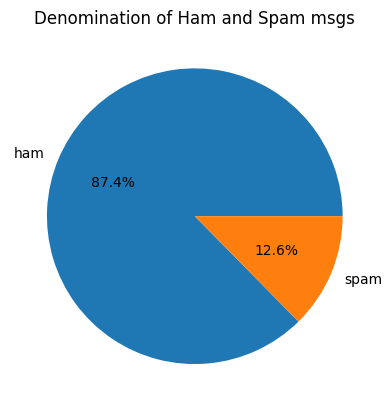

In [88]:
plt.title('Denomination of Ham and Spam msgs')
denom = df['target'].value_counts()
plt.pie(denom, labels = denom.index, autopct='%1.1f%%')
plt.show()
# some cells might be an extension of our data analysis, in the text pre processing section

**TEXT PREPROCESSING**

In [89]:

import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

def modf_text(text):

  # tokenise the text = breaking down into words
  text = nltk.word_tokenize(text)
  # lower case conversion of words with removal of special characters ( not alphanumeric )
  text = [word.lower() for word in text if word.isalpha()]
  # removing stopwords
  text = [word for word in text if word not in stopwords.words('english')]
  # remove punctuation marks
  text = [word for word in text if word not in string.punctuation]
  # stemming
  ps = nltk.PorterStemmer()
  text = [ps.stem(word) for word in text]
  # return the modified text
  return ' '.join(text)

# testing a sample text
modf_text('Hi @Sma YUIIO, I am not @taKIN your gIft*!!!')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'hi sma yuiio takin gift'

In [90]:
print('Following are stopwords, refer for understanding')
# uncomment below to read
# stopwords.words('english')[]

Following are stopwords, refer for understanding


In [91]:
# applying that to the msgs column
df['msgs'] = df['msgs'].apply(modf_text)
df

,target,msgs
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt may ...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though
...,...,...
5567,spam,time tri contact u pound prize claim easi call...
5568,ham,b go esplanad fr home
5569,ham,piti mood suggest
5570,ham,guy bitch act like interest buy someth els nex...


In [92]:
# Label encoding of 'target' columns

from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.head()

# ham = 0, spam = 1

,target,msgs
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt may ...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


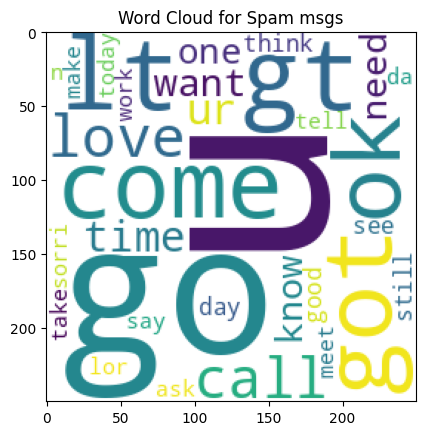

In [93]:
wc = WordCloud(height =250, width = 250, min_font_size=15, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['msgs'].str.cat(sep=' '))
ham_wc = wc.generate(df[df['target'] == 0]['msgs'].str.cat(sep=' '))


plt.title('Word Cloud for Spam msgs')
plt.imshow(spam_wc)


plt.show()

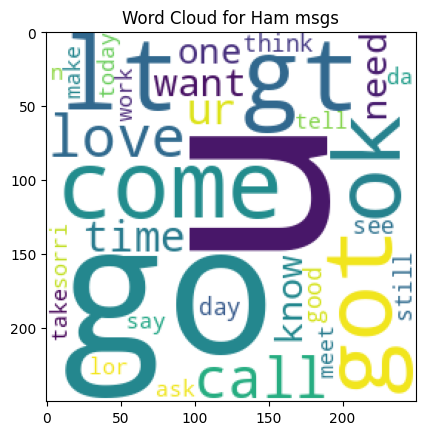

In [94]:
plt.title('Word Cloud for Ham msgs')
plt.imshow(ham_wc)

In [95]:
sp_w = df[df['target'] == 1]['msgs'].tolist()
h_w = df[df['target'] == 0]['msgs'].tolist()

spam_corpus = [word for msg in sp_w for word in msg.split()]
ham_corpus = [word for msg in h_w for word in msg.split()]
Counter(spam_corpus).most_common(20)

[('call', 320),
 ('free', 191),
 ('txt', 141),
 ('text', 122),
 ('u', 122),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55)]

In [96]:

Counter(ham_corpus).most_common(20)

[('u', 892),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('ok', 233),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159)]

In [97]:
s_df = pd.DataFrame(Counter(spam_corpus).most_common(20), columns=['words', 'count'])
s_df
#returns word count of highest occuring words

,words,count
0,call,320
1,free,191
2,txt,141
3,text,122
4,u,122
5,ur,119
6,mobil,114
7,stop,104
8,repli,103
9,claim,98


In [98]:
h_df = pd.DataFrame(Counter(ham_corpus).most_common(20), columns  = ['words' , 'count'])
h_df

,words,count
0,u,892
1,go,404
2,get,349
3,gt,288
4,lt,287
5,come,275
6,got,236
7,know,236
8,like,234
9,ok,233


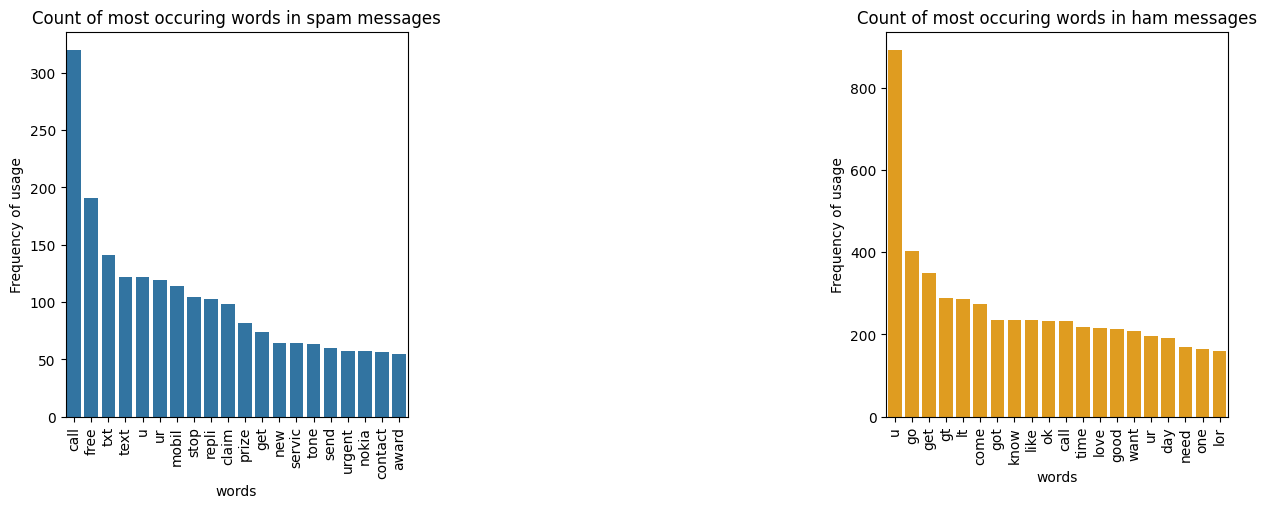

In [99]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Count of most occuring words in spam messages')
plt.ylabel('Frequency of usage')
sns.barplot(data = s_df, x= 'words', y = 'count')
plt.xticks(rotation = 90)
plt.subplot(1, 3, 3)
plt.title('Count of most occuring words in ham messages')
plt.ylabel('Frequency of usage')
sns.barplot(data = h_df, x='words', y = 'count', color='orange')
plt.xticks(rotation = 90)
plt.show()

**SPLITTING DATA**

---count vectoriser---

In [100]:

# First we would experiment with Count vectorizing method and then tfidf one
cv = CountVectorizer()
X = cv.fit_transform(df['msgs']).toarray()
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [101]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
y_pred_1 = gnb.predict(X_test)
y_pred_2 = mnb.predict(X_test)
y_pred_3 = bnb.predict(X_test)

In [102]:
print(f'GaussianNB accuracy: {accuracy_score(y_test, y_pred_1)}')
print(f'GaussianNB precision:{precision_score(y_test, y_pred_1)}')
print(' \n')
print(f'MultinomialNB accuracy: {accuracy_score(y_test, y_pred_2)}')
print(f'MultinomialNB precision:{precision_score(y_test, y_pred_2)}')

print(' \n')
print(f'BernoulliNB accuracy: {accuracy_score(y_test, y_pred_3)}')
print(f'BernoulliNB precision:{precision_score(y_test, y_pred_3)}')


GaussianNB accuracy: 0.8539651837524178
GaussianNB precision:0.46551724137931033
 

MultinomialNB accuracy: 0.9642166344294004
MultinomialNB precision:0.831081081081081
 

BernoulliNB accuracy: 0.9545454545454546
BernoulliNB precision:0.9230769230769231


In [103]:
%pip install xgboost

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [135]:
lr = LogisticRegression(solver = 'liblinear', penalty= 'l1')
dt = DecisionTreeClassifier(max_depth = 5)
rf = RandomForestClassifier(n_estimators=50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, random_state=2)
xgb = XGBClassifier(n_estimators=50, learning_rate=0.7, random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbdt.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [106]:
for clf in (lr, dt, rf, gbdt, xgb):
  y_pred = clf.predict(X_test)
  print(f'{clf.__class__.__name__} accuracy: {accuracy_score(y_test, y_pred)}')
  print(f'{clf.__class__.__name__} precision: {precision_score(y_test, y_pred)}')
  print(' \n')


LogisticRegression accuracy: 0.9632495164410058
LogisticRegression precision: 0.944954128440367
 

DecisionTreeClassifier accuracy: 0.9206963249516441
DecisionTreeClassifier precision: 0.9206349206349206
 

RandomForestClassifier accuracy: 0.9642166344294004
RandomForestClassifier precision: 0.9711538461538461
 

GradientBoostingClassifier accuracy: 0.9535783365570599
GradientBoostingClassifier precision: 0.9484536082474226
 

XGBClassifier accuracy: 0.9593810444874274
XGBClassifier precision: 0.911504424778761
 



In [123]:
li_a = [accuracy_score(y_test, clf.predict(X_test)) for clf in (lr, dt, rf, gbdt, xgb)]
li_p = [precision_score(y_test, clf.predict(X_test)) for clf in (lr, dt, rf, gbdt, xgb)]
d_p = pd.DataFrame(li_p, index = ('lr', 'dt', 'rf', 'gbdt', 'xgb'), columns=['precision'])
d_a = pd.DataFrame(li_a, index = ('lr', 'dt', 'rf', 'gbdt', 'xgb'), columns=['accuracy'])
d = pd.concat([d_a, d_p], axis=1).sort_values('accuracy', ascending=False)
d

,accuracy,precision
xgb,0.967118,0.919355
lr,0.953578,0.950000
gbdt,0.943907,0.827869
dt,0.934236,0.843137
rf,0.869439,1.000000


Performance of model determined by precision of the model, there shudn't b False positives as per the case study

Thus, Random Forest Model is the best one if CountVectorizer() is used

Below Is a graph for more detailed understanding

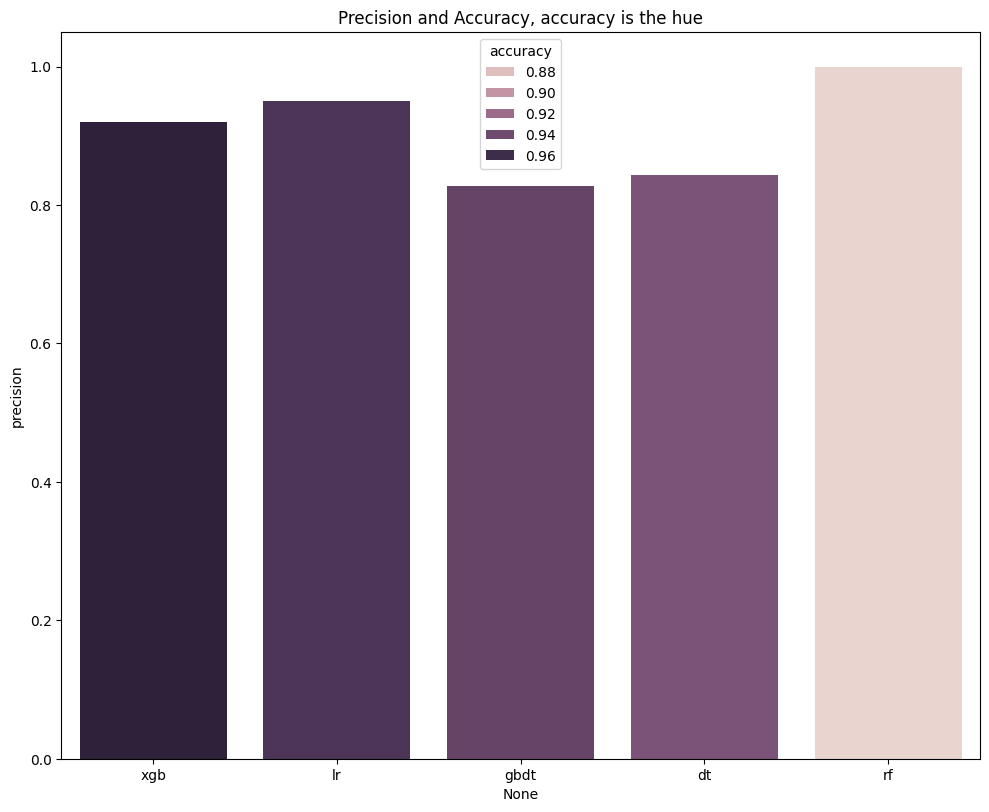

In [136]:
plt.figure(figsize=(10, 8))
sns.barplot(x=d.index, y=d['precision'], hue = d['accuracy'], legend= 'brief', )
plt.tight_layout()
plt.title('Precision and Accuracy, accuracy is the hue')
plt.show()

---TF-IDF vectorizer---

In [115]:
tf = TfidfVectorizer()
X =tf.fit_transform(df['msgs']).toarray()
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
gnb_1 = GaussianNB()
mnb_1 = MultinomialNB()
bnb_1 = BernoulliNB()

gnb_1.fit(X_train, y_train)
mnb_1.fit(X_train, y_train)
bnb_1.fit(X_train, y_train)
y_pred_1_ = gnb.predict(X_test)
y_pred_2_ = mnb.predict(X_test)
y_pred_3_ = bnb.predict(X_test)

In [117]:
print(f'GaussianNB accuracy: {accuracy_score(y_test, y_pred_1_)}')
print(f'GaussianNB precision:{precision_score(y_test, y_pred_1_)}')
print(' \n')
print(f'MultinomialNB accuracy: {accuracy_score(y_test, y_pred_2_)}')
print(f'MultinomialNB precision:{precision_score(y_test, y_pred_2_)}')

print(' \n')
print(f'BernoulliNB accuracy: {accuracy_score(y_test, y_pred_3_)}')
print(f'BernoulliNB precision:{precision_score(y_test, y_pred_3_)}')
#Multinomial NB may be the most preferred model in this approach

GaussianNB accuracy: 0.9090909090909091
GaussianNB precision:0.6009174311926605
 

MultinomialNB accuracy: 0.9806576402321083
MultinomialNB precision:0.9758064516129032
 

BernoulliNB accuracy: 0.9738878143133463
BernoulliNB precision:0.9743589743589743


In [127]:
lr = LogisticRegression(solver = 'liblinear', penalty= 'l1')
dt = DecisionTreeClassifier(max_depth = 5)
rf_1 = RandomForestClassifier(n_estimators=50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, random_state=2)
xgb = XGBClassifier(n_estimators=50, learning_rate=0.7, random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf_1.fit(X_train, y_train)
gbdt.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [126]:
li_a_1 = [accuracy_score(y_test, clf.predict(X_test)) for clf in (lr, dt, rf, gbdt, xgb)]
li_p_1 = [precision_score(y_test, clf.predict(X_test)) for clf in (lr, dt, rf, gbdt, xgb)]
d_p_1 = pd.DataFrame(li_p_1, index = ('lr', 'dt', 'rf', 'gbdt', 'xgb'), columns=['precision'])
d_a_1 = pd.DataFrame(li_a_1, index = ('lr', 'dt', 'rf', 'gbdt', 'xgb'), columns=['accuracy'])
d_1 = pd.concat([d_a_1, d_p_1], axis=1).sort_values('accuracy', ascending=False)
d_1

,accuracy,precision
xgb,0.967118,0.919355
lr,0.953578,0.950000
gbdt,0.943907,0.827869
dt,0.932302,0.826923
rf,0.869439,1.000000


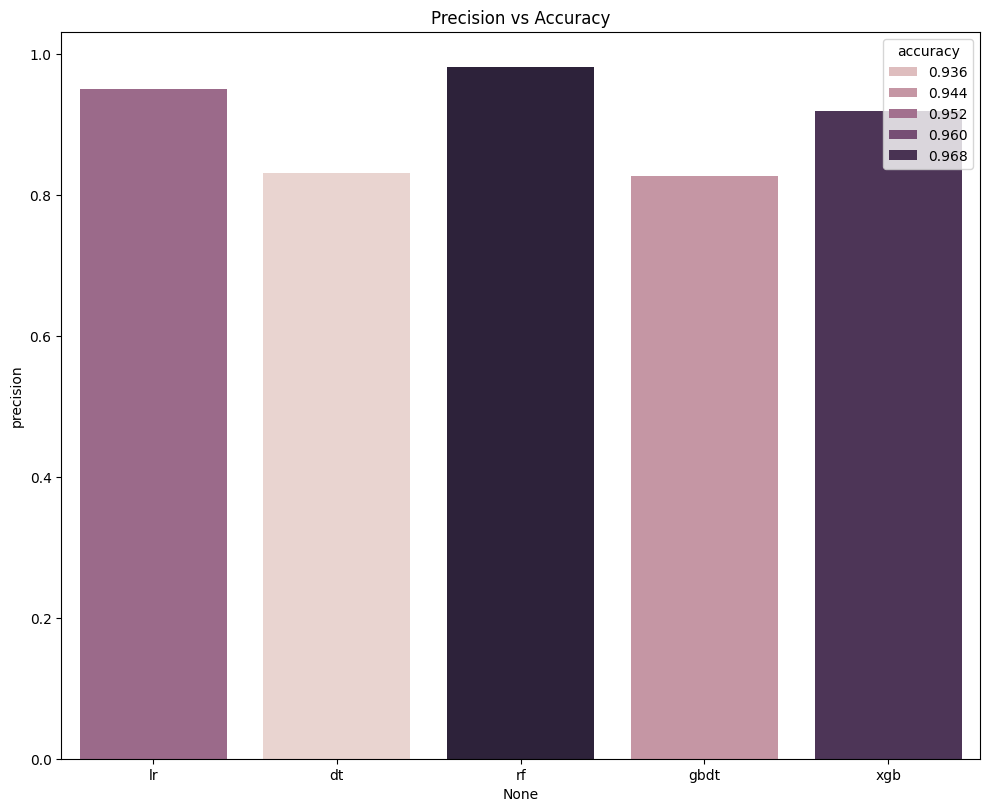

In [77]:
plt.figure(figsize=(10, 8))
sns.barplot(x=d_1.index, y=d_1['precision'], hue = d_1['accuracy'], legend= 'brief', )
plt.tight_layout()
plt.title('Precision vs Accuracy')
plt.show()
#Rf model may also be preferred

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

IMPROVEMENT THROUGH VOTING CLASSIFIER APPROACH

In [129]:
from sklearn.ensemble import VotingClassifier
# Using Logistic Regression, Multinomial Naive Bayes, and Random Forest based on previous results
estimators = [('bnb', bnb_1), ('mnb', mnb_1), ('rf', rf)]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

print(f'Voting Classifier accuracy: {accuracy_score(y_test, y_pred_voting)}')
print(f'Voting Classifier precision: {precision_score(y_test, y_pred_voting)}')


Voting Classifier accuracy: 0.9700193423597679
Voting Classifier precision: 1.0


In [139]:
from sklearn.ensemble import VotingClassifier

estimators_soft = [('lr', lr) ,('mnb', mnb_1), ('bnb', bnb_1), ('xgb', xgb), ('rf', rf),('rf1', rf_1)]


voting_clf_soft = VotingClassifier(estimators=estimators_soft, voting='soft')

voting_clf_soft.fit(X_train, y_train)

y_pred_voting_soft = voting_clf_soft.predict(X_test)

# Evaluate the voting classifier
print(f'Voting Classifier (Soft Voting) accuracy: {accuracy_score(y_test, y_pred_voting_soft)}')
print(f'Voting Classifier (Soft Voting) precision: {precision_score(y_test, y_pred_voting_soft)}')
# combo of the models along with soft voting approach, resulting in model to be the most effective discrimanatory model from the pool of models provided

Voting Classifier (Soft Voting) accuracy: 0.9738878143133463
Voting Classifier (Soft Voting) precision: 1.0


In the case of imbalanced dataset we are more concerned with the precision score obtained through models

IMPROVEMENT THROUGH STACK CLASSIFIER APPROACH (trial, may not improve though)

In [144]:
estimators_st = [('mnb', mnb_1), ('bnb', bnb_1),('rf1', rf_1)]
final_estim = RandomForestClassifier()
stack_clf = StackingClassifier(estimators = estimators_st, final_estimator = final_estim)
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)

In [145]:
# Evaluate the voting classifier
print(f'Stacking Classifier (Soft Voting) accuracy: {accuracy_score(y_test, y_pred_stack)}')
print(f'Stacking Classifier (Soft Voting) precision: {precision_score(y_test, y_pred_stack)}')

# no better result obtained from this

Stacking Classifier (Soft Voting) accuracy: 0.9796905222437138
Stacking Classifier (Soft Voting) precision: 0.927007299270073


CONCLUSION

Soft Voting Classifier appear to be the most robust model for discrimination b/w spam and ham messages for the dataset

This achieves perfect precision on the test while maintaining high accuracy

TEST RUNS ON THE MODEL

In [151]:
voting_clf_soft.predict(tf.transform(['free wkli comp win fa cup final tkt may ']))
# array([1]) = spam message

array([1])

In [154]:
voting_clf_soft.predict(tf.transform(['new servic price get']))

array([1])

In [155]:
voting_clf_soft.predict(tf.transform(['one lor love ok']))

array([0])